# Sheet
Vergelijk de verschillen in de NBS per issue en per waarde van p

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
%matplotlib inline

In [2]:
conn = sqlite3.connect('/home/jelmert/Documents/decide-kopenhagen-no-ties.db')

In [3]:
df = pd.read_sql("""
SELECT
  a.p as p,
  a.issue as issue,
  a.iteration as iteration,
  a.repetion as repetion,
  a.numerator / a.denominator AS nbs
FROM (SELECT
        sum(ai.position * ai.power * ai.salience) AS numerator,
        sum(ai.salience * ai.power)               AS denominator,
        r.pointer                                 AS repetion,
        i2.pointer                                AS iteration,
        m.p,
  i.name as issue
      FROM actorissue ai
        LEFT JOIN issue i ON ai.issue_id = i.id
        LEFT JOIN actor a ON ai.actor_id = a.id
        LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
        LEFT JOIN repetition r ON i2.repetition_id = r.id
        LEFT JOIN modelrun m ON r.model_run_id = m.id
        LEFT JOIN dataset d ON a.data_set_id = d.id
      WHERE  ai.type = 'before' AND d.id = ?
     GROUP BY m.id,r.id, i2.id, i.id) a
""", 
                 conn, 
                 params=(1,),
                 index_col='p',                  
                 columns=['nbs']
                )

def avg_std(series):
    avg = np.average(series)
    std = np.var(series, ddof=1)
    
    return '{0} ({1})'.format(round(avg, 5), round(std, 5)) 

table = pd.pivot_table(df, index=['issue','p'], columns=['iteration'],values=['nbs'],aggfunc=[avg_std])


# Verloop NBS
In onderstaande tabel wordt het gemiddelde verloop van de NBS scores getoond per issue. Tussen haakjes achter de NBS score staat de standaarddeviatie.

Onder de tabel staat het verloop van het gemiddelde afgebeeld in een grafiek per issue

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
table

avg_std                                          \
                             nbs                                           
iteration                      0                   1                   2   
issue       p                                                              
Commitments 0.00    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.05    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.15    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.20    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.25    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.30    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.35    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.40    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.45    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.50    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.55    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.60    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.65    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.70    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.75    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.80    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.85    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            0.90    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
            1.00    5.8104 (0.0)       3.52905 (0.0)        2.1474 (0.0)   
Control     0.00  33.62143 (0.0)       43.2034 (0.0)      50.16615 (0.0)   
            0.05  33.62143 (0.0)  43.20452 (0.00056)  50.16758 (0.00049)   
            0.15  33.62143 (0.0)     43.0377 (0.644)   50.02451 (0.4509)   
            0.20  33.62143 (0.0)  42.40203 (2.59456)   49.51021 (1.7466)   
            0.25  33.62143 (0.0)   41.8818 (3.62878)   49.08702 (2.3947)   
            0.30  33.62143 (0.0)  41.58441 (3.89354)  48.84672 (2.49256)   
            0.35  33.62143 (0.0)  41.45988 (3.91685)    48.732 (2.48015)   
            0.40  33.62143 (0.0)  41.10869 (3.97782)  48.44887 (2.45147)   
            0.45  33.62143 (0.0)  40.94604 (3.81922)  48.32975 (2.32379)   
            0.50  33.62143 (0.0)  40.66839 (3.55593)   48.1141 (2.09682)   
            0.55  33.62143 (0.0)  40.82679 (3.60858)  48.22949 (2.11017)   
            0.60  33.62143 (0.0)  40.71798 (3.40234)  48.17205 (1.96333)   
            0.65  33.62143 (0.0)  40.67669 (3.38723)  48.09243 (1.91393)   
            0.70  33.62143 (0.0)  40.67397 (3.34889)  48.07336 (1.84004)   
            0.75  33.62143 (0.0)   40.53497 (3.0284)  47.98408 (1.57142)   
            0.80  33.62143 (0.0)  40.51803 (2.93934)   47.9384 (1.49637)   
            0.85  33.62143 (0.0)  40.48605 (2.76246)  47.95149 (1.47159)   
            0.90  33.62143 (0.0)  40.38675 (2.56457)  47.87385 (1.29233)   
            1.00  33.62143 (0.0)  40.45259 (2.54764)   47.8965 (1.23108)   
DevlopC2020 0.00  45.88123 (0.0)      45.58451 (0.0)      46.19872 (0.0)   
            0.05  45.88123 (0.0)  45.59148 (0.00053)   46.2116 (0.00084)   
            0.15  45.88123 (0.0)  45.69708 (0.25502)  46.32506 (0.24403)   
            0.20  45.88123 (0.0)  46.10028 (1.03781)  46.71302 (0.96287)   
            0.25  45.88123 (0.0)  46.43047 (1.46677)  47.03462 (1.34714)   
            0.30  45.88123 (0.0)  46.62186 (1.61642)  47.22388 (1.47293)   
            0.35  45.88123 (0.0)  46.70775 (1.68173)  47.31416 (1.50887)   
            0.40  45.88123 (0.0)  46.95549 (1.67149)  47.56123 (1.49587)   
            0.45  45.88123 (0.0)  47.06394 (1.66778)  47.65831 (1.47297)   
            0.50  45.88123 (0.0)  47.27533 (1.53892)  47.87888 (1.36041)   
            0.55  45.88123 (0.0)  47.18886 (1.61954)  47.79759 (1.42291) 

In [5]:
cursor = conn.execute('SELECT issue.name, issue.id FROM issue ORDER BY issue.name')
issues = cursor.fetchall()

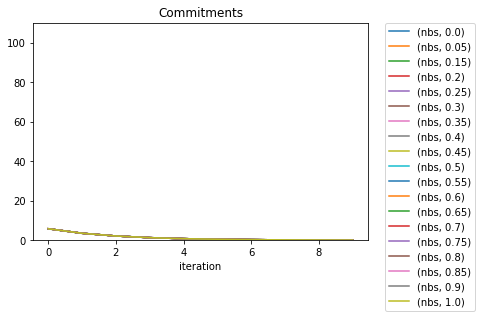

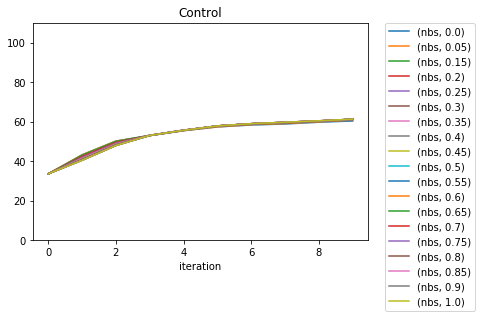

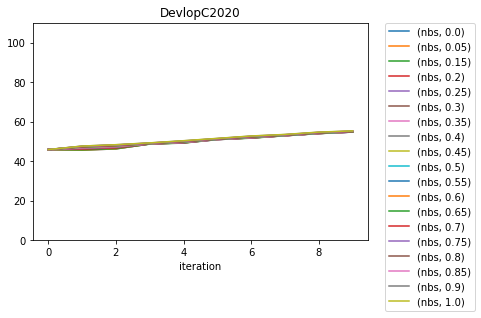

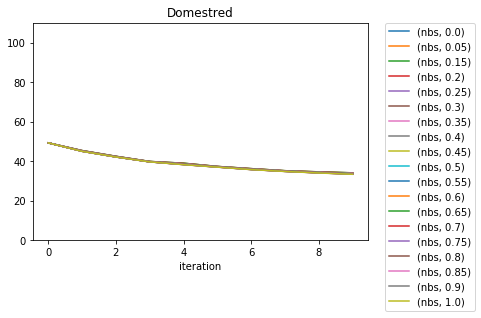

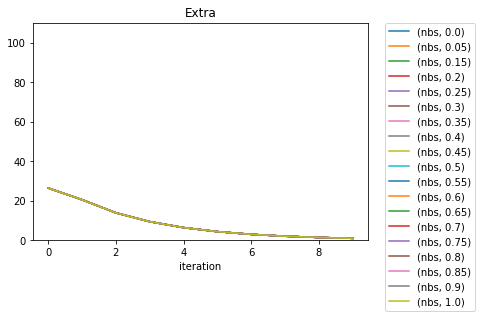

In [6]:
for name, issue_id in issues:
    df = pd.read_sql("""
    SELECT
    a.p as p,
    a.issue as issue,
    a.iteration as iteration,
    a.repetion as repetion,
    a.numerator / a.denominator AS nbs
    FROM (SELECT
    sum(ai.position * ai.power * ai.salience) AS numerator,
    sum(ai.salience * ai.power)
    AS denominator,
    r.pointer
    AS repetion,
    i2.pointer
    AS iteration,
    m.p,
    i.name as issue
    FROM actorissue ai
    LEFT JOIN issue i ON ai.issue_id = i.id
    LEFT JOIN actor a ON ai.actor_id = a.id
    LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
    LEFT JOIN repetition r ON i2.repetition_id = r.id
    LEFT JOIN modelrun m ON r.model_run_id = m.id
    LEFT JOIN dataset d ON a.data_set_id = d.id
    WHERE ai.type = 'before' AND d.id = ? AND i.id = ?
    GROUP BY m.id,r.id, i2.id, i.id) a
    """,
    conn,
    params=(1,issue_id),
    index_col='p',
    columns=['nbs']
    )
    table = pd.pivot_table(df, index=['iteration'], columns=['p'], values=['nbs'])
    plot = table.plot()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(name)
    plt.ylim(0, 110)
    plt.show()

# Detail-niveau
Onderstaande grafieken zijn op detail-niveau met een automatische min-max voor de x en y-assen 

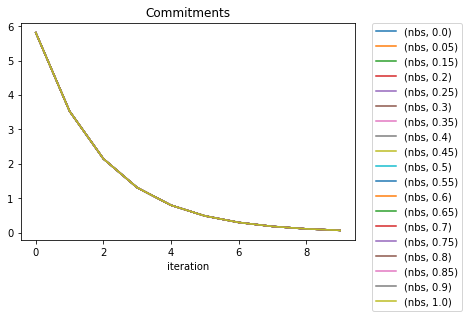

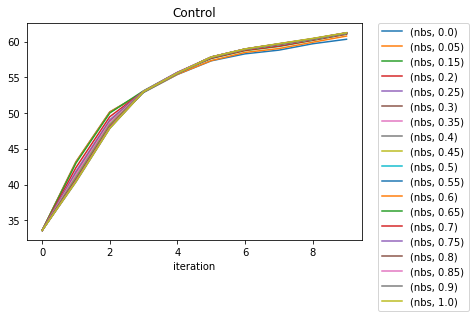

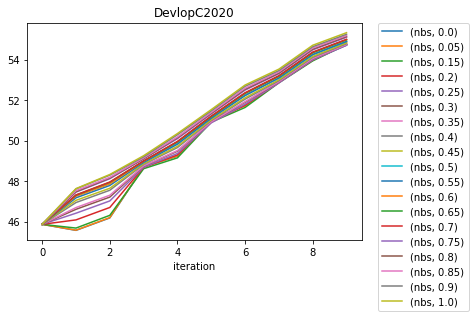

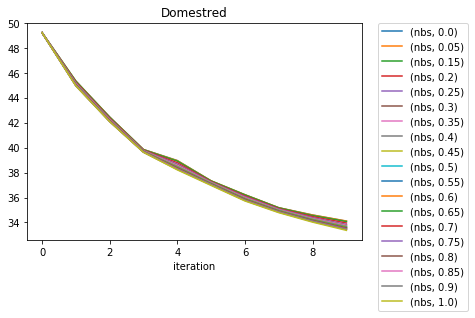

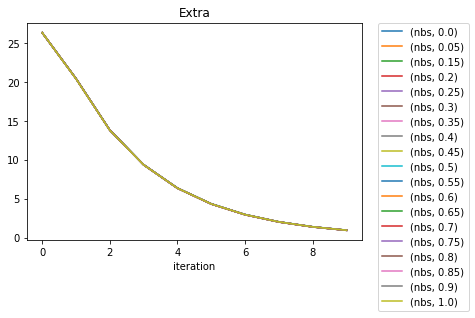

In [7]:
for name, issue_id in issues:
    df = pd.read_sql("""
    SELECT
    a.p as p,
    a.issue as issue,
    a.iteration as iteration,
    a.repetion as repetion,
    a.numerator / a.denominator AS nbs
    FROM (SELECT
    sum(ai.position * ai.power * ai.salience) AS numerator,
    sum(ai.salience * ai.power)
    AS denominator,
    r.pointer
    AS repetion,
    i2.pointer
    AS iteration,
    m.p,
    i.name as issue
    FROM actorissue ai
    LEFT JOIN issue i ON ai.issue_id = i.id
    LEFT JOIN actor a ON ai.actor_id = a.id
    LEFT JOIN iteration i2 ON ai.iteration_id = i2.id
    LEFT JOIN repetition r ON i2.repetition_id = r.id
    LEFT JOIN modelrun m ON r.model_run_id = m.id
    LEFT JOIN dataset d ON a.data_set_id = d.id
    WHERE ai.type = 'before' AND d.id = ? AND i.id = ?
    GROUP BY m.id,r.id, i2.id, i.id) a
    """,
    conn,
    params=(1,issue_id),
    index_col='p',
    columns=['nbs']
    )
    table = pd.pivot_table(df, index=['iteration'], columns=['p'], values=['nbs'])
    plot = table.plot()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(name)    
    plt.show()